A partir del dataset mnist (tf.keras.datasets.mnist.load_data()), realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [24]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [25]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [26]:
data = keras.datasets.mnist
#print(keras.datasets.mnist.load_data())
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [27]:
# data analysis
print(f"train images shape: {train_images.shape}")
print(f"train labes shape: {train_labels.shape}")

print(f"test images shape: {test_images.shape}")
print(f"test labes shape: {test_labels.shape}")

train images shape: (60000, 28, 28)
train labes shape: (60000,)
test images shape: (10000, 28, 28)
test labes shape: (10000,)


In [28]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [29]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

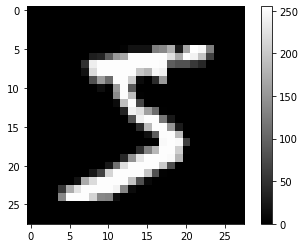

In [30]:
# Visualization. Pixeles go from 0 to 255
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.colorbar()
plt.grid(False)

plt.show()

In [31]:
# Standarization to keep all values between 0 to 1 (rather than 0 to 255)
train_images = train_images / 255.0
test_images = test_images / 255.0

1. Una CNN con:

1 capa convolutiva con 8 neuronas

1 MaxPool quedando las dimensiones de la imagen a la mitad

1 dropout 0.25

1 Flatten

1 dense con 32 neuronas

1 dense con 10 (salida)

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
# model
model = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(28, 28, 1), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                43296     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
__________________________________________________

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
train_images = np.expand_dims(train_images, axis=-1) 
print(train_images.shape)


(60000, 28, 28, 1)


In [36]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3083 - accuracy: 0.9102
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1545 - accuracy: 0.9530
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1181 - accuracy: 0.9635
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.9683
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0802 - accuracy: 0.9741
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0735 - accuracy: 0.9766
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9791
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9802
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.057

In [37]:
# Accuracy 
test_images = np.expand_dims(test_images, axis=-1) 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0578 - accuracy: 0.9825

Test accuracy: 0.9825000166893005


2. Una CNN con:

1 capa convolutiva con 8 neuronas

1 MaxPool quedando las dimensiones de la imagen a la mitad

1 dropout 0.25

1 Flatten

1 dense con 16 neuronas

1 dense con 32 neuronas

1 dense con 10 (salida)

In [38]:
# model
model_1 = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(28, 28, 1), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model_1.summary())

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                21648     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [39]:
model_1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3830 - accuracy: 0.8818
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1946 - accuracy: 0.9405
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1607 - accuracy: 0.9506
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1384 - accuracy: 0.9574
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1218 - accuracy: 0.9631
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1094 - accuracy: 0.9657
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0999 - accuracy: 0.9694
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0907 - accuracy: 0.9715
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9730
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.081

In [40]:
# Accuracy 
test_loss_1, test_acc_1 = model_1.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc_1)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9797

Test accuracy: 0.9797000288963318


In [42]:
print(f"The first model gives a lost of {test_loss} and the second {test_loss_1}. The first model gives an accuracy of {test_acc} and the second {test_acc_1}. The first model is more accurate, so an extra dense layer is not required.")

The first model gives a lost of 0.05776936560869217 and the second 0.06487603485584259. The first model gives an accuracy of 0.9825000166893005 and the second 0.9797000288963318. The first model is more accurate, so an extra dense layer is not required.
